In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [3]:
df = pd.read_csv("/Users/ccreanga/projects/Boundaries/TableS3_hamming", sep="\t", index_col=0)
df

,Siciliano,Calabrese_Northern,Italian,Spanish,French,Portuguese,Romanian,Greek_Calabria,Greek,Greek_Cypriot,...,Kazakh,Kirghiz,Turkish,Buryat,Basque_Central,Basque_Western,Wolof,Malagasy,Archi,Lak
Siciliano,0.000,0.075,0.046,0.094,0.100,0.062,0.113,0.129,0.183,0.183,...,0.306,0.306,0.306,0.256,0.265,0.286,0.356,0.350,0.270,0.270
Calabrese_Northern,0.075,0.000,0.062,0.109,0.150,0.109,0.097,0.113,0.167,0.167,...,0.306,0.306,0.306,0.282,0.265,0.286,0.378,0.350,0.270,0.270
Italian,0.046,0.062,0.000,0.091,0.098,0.061,0.094,0.150,0.180,0.180,...,0.306,0.306,0.306,0.256,0.265,0.286,0.378,0.350,0.270,0.270
Spanish,0.094,0.109,0.091,0.000,0.098,0.045,0.125,0.153,0.150,0.150,...,0.278,0.278,0.278,0.282,0.229,0.250,0.409,0.375,0.278,0.278
French,0.100,0.150,0.098,0.098,0.000,0.082,0.133,0.161,0.175,0.175,...,0.314,0.314,0.314,0.308,0.277,0.292,0.381,0.310,0.297,0.297
Portuguese,0.062,0.109,0.061,0.045,0.082,0.000,0.125,0.153,0.183,0.183,...,0.306,0.306,0.306,0.256,0.250,0.271,0.386,0.375,0.278,0.278
Romanian,0.113,0.097,0.094,0.125,0.133,0.125,0.000,0.138,0.186,0.186,...,0.333,0.333,0.333,0.282,0.255,0.277,0.395,0.410,0.278,0.278
Greek_Calabria,0.129,0.113,0.150,0.153,0.161,0.153,0.138,0.000,0.083,0.083,...,0.278,0.278,0.278,0.316,0.333,0.356,0.295,0.300,0.243,0.243
Greek,0.183,0.167,0.180,0.150,0.175,0.183,0.186,0.083,0.000,0.015,...,0.250,0.250,0.250,0.333,0.341,0.311,0.364,0.325,0.237,0.237
Greek_Cypriot,0.183,0.167,0.180,0.150,0.175,0.183,0.186,0.083,0.015,0.000,...,0.250,0.250,0.250,0.333,0.341,0.311,0.364,0.325,0.237,0.237


In [9]:
df_melt = df.rename_axis('index_column').reset_index()

# Melt the DataFrame
melted_df = pd.melt(df_melt, id_vars='index_column', var_name='variable', value_name='value')


In [10]:
melted_df

,index_column,variable,value
0,Siciliano,Siciliano,0.000
1,Calabrese_Northern,Siciliano,0.075
2,Italian,Siciliano,0.046
3,Spanish,Siciliano,0.094
4,French,Siciliano,0.100
...,...,...,...
3359,Basque_Western,Lak,0.286
3360,Wolof,Lak,0.467
3361,Malagasy,Lak,0.303
3362,Archi,Lak,0.025


In [11]:
sorted_melted_df = melted_df.sort_values(by='value')
sorted_melted_df

,index_column,variable,value
0,Siciliano,Siciliano,0.000
1593,Pashto,Pashto,0.000
1534,Hindi,Hindi,0.000
1475,Marathi,Marathi,0.000
1416,Welsh,Welsh,0.000
...,...,...,...
1678,Wolof,Tamil,0.516
2200,Wolof,Khanty,0.517
3169,Khanty,Wolof,0.517
3164,Japanese,Wolof,0.524


In [15]:
import csv
dist = []
for index, row in sorted_melted_df.iterrows():
    if row["value"] != 0:
        dist.append((row["variable"], row["index_column"], row["value"]))
with open('sorted_distances.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for row in dist:
        writer.writerow(row)

In [5]:
df['Japanese']['Korean']

0.097

In [140]:
for col in df.columns:
    top_n = df[col].nsmallest(5)
    for i, x in enumerate(top_n):
        if x > 0 and x <= 0.02:
            print(top_n[i], x)

0.015 0.015
0.015 0.015
0.019 0.019
0.019 0.019
0.016 0.016
0.016 0.016


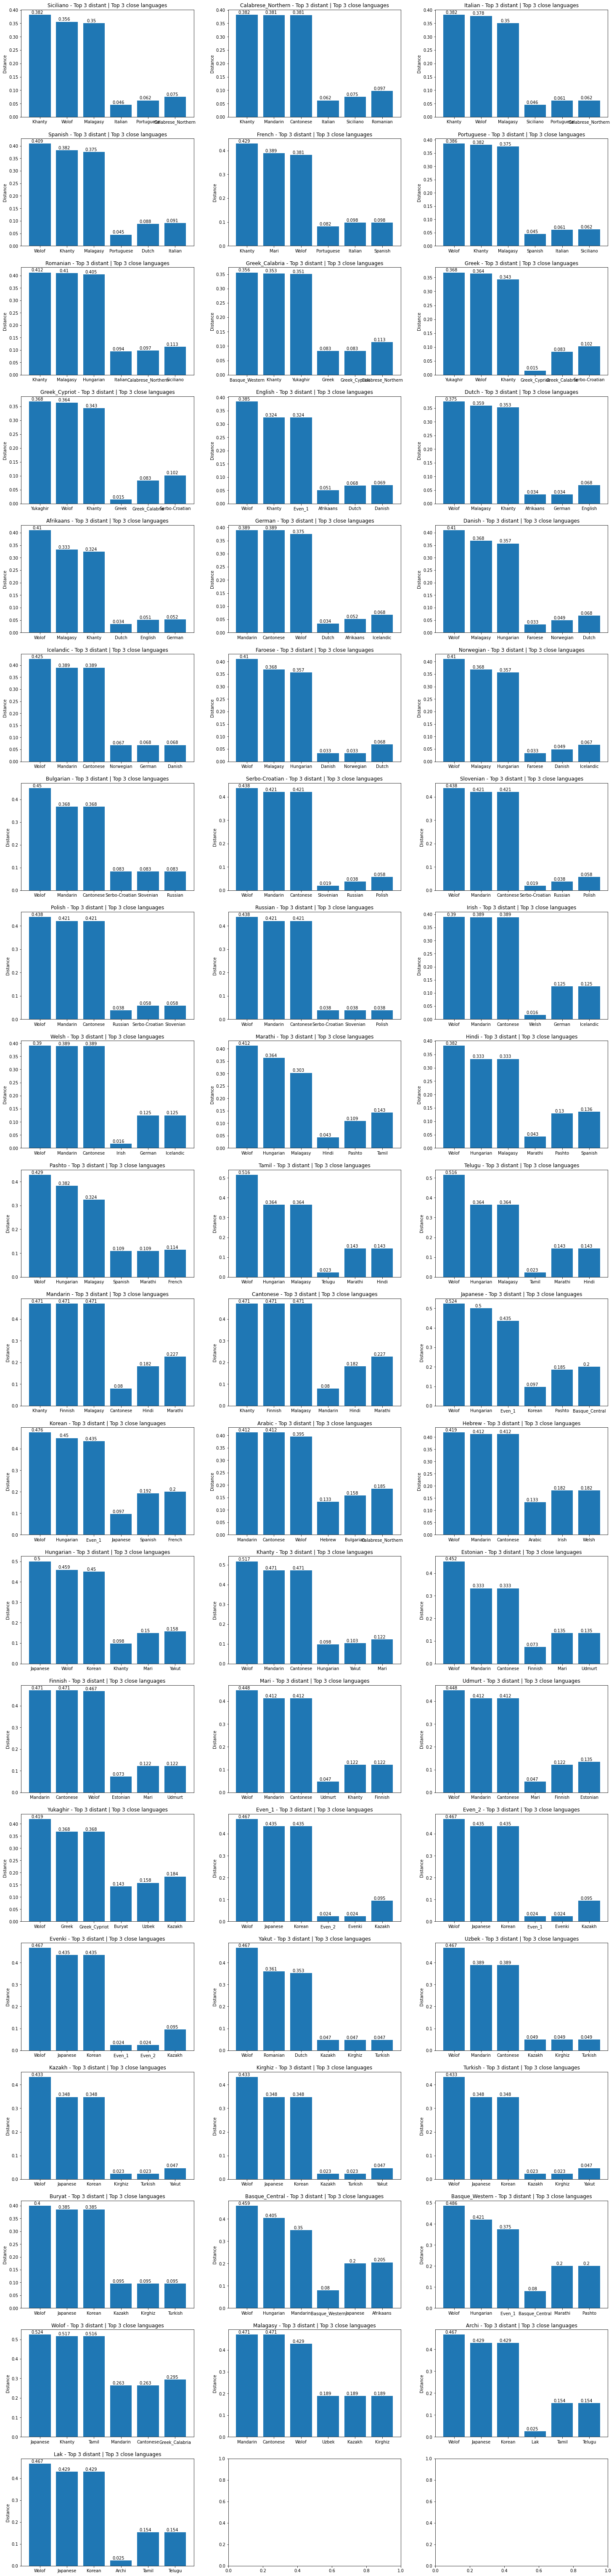

In [5]:
def get_top_n_per_column(df, n):
    result = {}
    for col in df.columns:
        top_n = df[col].nlargest(n)
        top_n_values = top_n.tolist()
        top_n_indices = top_n.index.tolist()
        bottom_n = df[col].nsmallest(n + 1)[1:]
        bottom_n_values = bottom_n.tolist()
        bottom_n_indices = bottom_n.index.tolist()
        top_n_data = list(zip(top_n_indices + bottom_n_indices, top_n_values + bottom_n_values))
        result[col] = top_n_data
        
    return result

top_3_per_column = get_top_n_per_column(df, 3)

# Calculate the number of rows and columns
num_rows = int(len(top_3_per_column) / 3) + 1
num_cols = 3

# Initialize the figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 45))
fig.subplots_adjust(wspace=0.2, hspace=0.2, top=2)
iterable = iter(top_3_per_column.items())

# Plot the top 3 distances for each column in a subplot
row_index = 0
i = 0
for row in range(num_rows):
    for col_index in range(num_cols):
        if i > 57:
            break
        current = next(iterable)
        title = current[0]
        top_n_indices, top_n_values = zip(*current[1])
        bars = axes[row_index, col_index].bar(top_n_indices, top_n_values)
        axes[row_index, col_index].set_title(f"{title} - Top 3 distant | Top 3 close languages")
        axes[row_index, col_index].set_ylabel("Distance")
        for bar, value in zip(bars, top_n_values):
            axes[row_index, col_index].text(
                bar.get_x() + bar.get_width() / 2 - 0.1,
                bar.get_height() + 0.001,
                f"{value}",
                ha="center",
                va="bottom",
            )
        i += 1
    row_index += 1
    

# Adjust layout and display the plot
# fig.tight_layout(pad=4.4, w_pad=1.5, h_pad=4.0)
# plt.savefig("top_3_distances_for_each_language.jpg")
# plt.show()


In [102]:
print(top_3_per_column)

{'Siciliano': [('Khanty', 0.382), ('Wolof', 0.356), ('Malagasy', 0.35), ('Italian', 0.046), ('Portuguese', 0.062), ('Calabrese_Northern', 0.075)], 'Calabrese_Northern': [('Khanty', 0.382), ('Mandarin', 0.381), ('Cantonese', 0.381), ('Italian', 0.062), ('Siciliano', 0.075), ('Romanian', 0.097)], 'Italian': [('Khanty', 0.382), ('Wolof', 0.378), ('Malagasy', 0.35), ('Siciliano', 0.046), ('Portuguese', 0.061), ('Calabrese_Northern', 0.062)], 'Spanish': [('Wolof', 0.409), ('Khanty', 0.382), ('Malagasy', 0.375), ('Portuguese', 0.045), ('Dutch', 0.088), ('Italian', 0.091)], 'French': [('Khanty', 0.429), ('Mari', 0.389), ('Wolof', 0.381), ('Portuguese', 0.082), ('Italian', 0.098), ('Spanish', 0.098)], 'Portuguese': [('Wolof', 0.386), ('Khanty', 0.382), ('Malagasy', 0.375), ('Spanish', 0.045), ('Italian', 0.061), ('Siciliano', 0.062)], 'Romanian': [('Khanty', 0.412), ('Malagasy', 0.41), ('Hungarian', 0.405), ('Italian', 0.094), ('Calabrese_Northern', 0.097), ('Siciliano', 0.113)], 'Greek_Calabr

In [103]:
for k, v in top_3_per_column.items():
    print(f"{k} : Most distant: {v[0]}, Closest: {v[3]}")

Siciliano : Most distant: ('Khanty', 0.382), Closest: ('Italian', 0.046)
Calabrese_Northern : Most distant: ('Khanty', 0.382), Closest: ('Italian', 0.062)
Italian : Most distant: ('Khanty', 0.382), Closest: ('Siciliano', 0.046)
Spanish : Most distant: ('Wolof', 0.409), Closest: ('Portuguese', 0.045)
French : Most distant: ('Khanty', 0.429), Closest: ('Portuguese', 0.082)
Portuguese : Most distant: ('Wolof', 0.386), Closest: ('Spanish', 0.045)
Romanian : Most distant: ('Khanty', 0.412), Closest: ('Italian', 0.094)
Greek_Calabria : Most distant: ('Basque_Western', 0.356), Closest: ('Greek', 0.083)
Greek : Most distant: ('Yukaghir', 0.368), Closest: ('Greek_Cypriot', 0.015)
Greek_Cypriot : Most distant: ('Yukaghir', 0.368), Closest: ('Greek', 0.015)
English : Most distant: ('Wolof', 0.385), Closest: ('Afrikaans', 0.051)
Dutch : Most distant: ('Wolof', 0.375), Closest: ('Afrikaans', 0.034)
Afrikaans : Most distant: ('Wolof', 0.41), Closest: ('Dutch', 0.034)
German : Most distant: ('Mandari

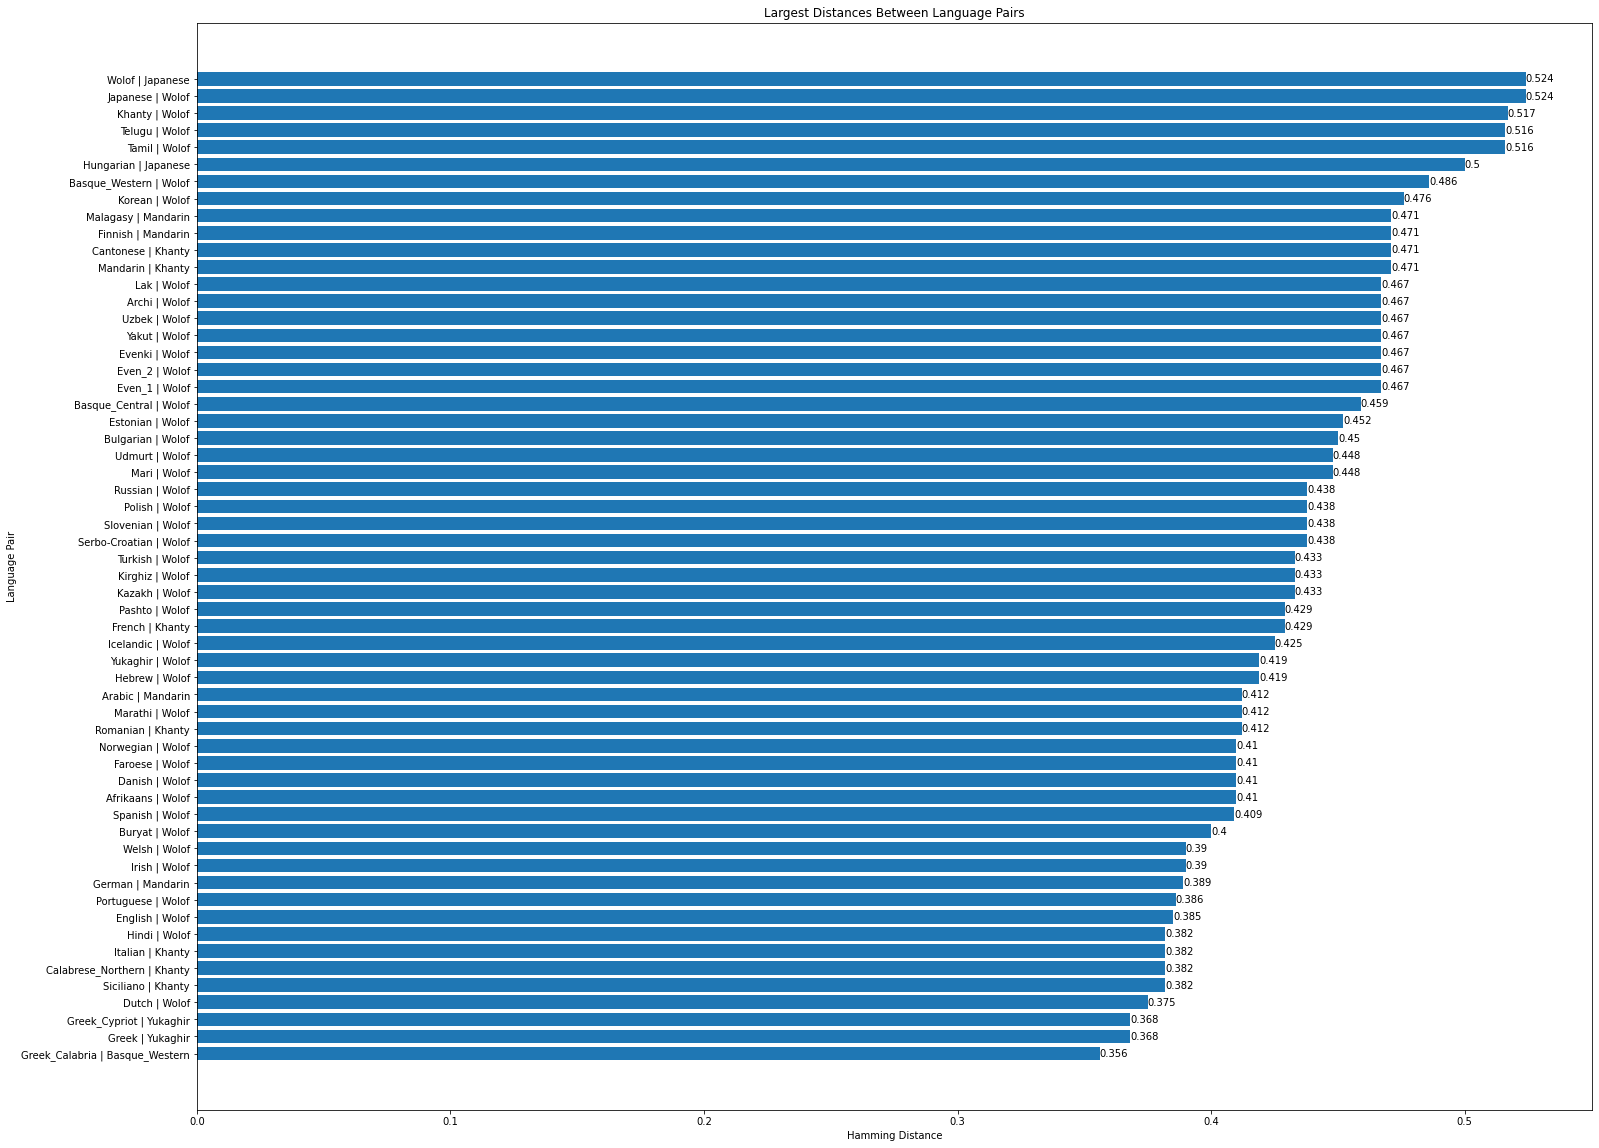

In [104]:
def get_top_n_per_column(df, n):
    result = {}
    for col in df.columns:
        bottom_n = df[col].nlargest(1)
        bottom_n_values = bottom_n.tolist()
        bottom_n_indices = bottom_n.index.tolist()
        top_n_data = list(zip(bottom_n_indices, bottom_n_values))
        result[col] = top_n_data
        
    return result

top_distances = get_top_n_per_column(df, 1)
top_distances
result = {}
seen = set()
for k,v in top_distances.items():
    if k not in result:
        result[f"{k} | {v[0][0]}"] =  v[0][1]
        seen.add(v[0][0])
        seen.add(k)
result
sorted_data = dict(sorted(result.items(), key=lambda item: item[1]))

# Extract language pairs and distances from the sorted dictionary
language_pairs = list(sorted_data.keys())
distances = list(sorted_data.values())

# Create a horizontal bar plot
plt.figure(figsize=(25, 20))
plt.barh(language_pairs, distances)
plt.xlabel('Hamming Distance')
plt.ylabel('Language Pair')
plt.title('Largest Distances Between Language Pairs')
# Display distance values on top of bars
for i, v in enumerate(distances):
    plt.text(v, i, str(v), va='center')
# plt.yticks(rotation=0, ha='center')  # Rotate y-axis labels for better readability
plt.savefig("largest_distances.jpg")
plt.show()

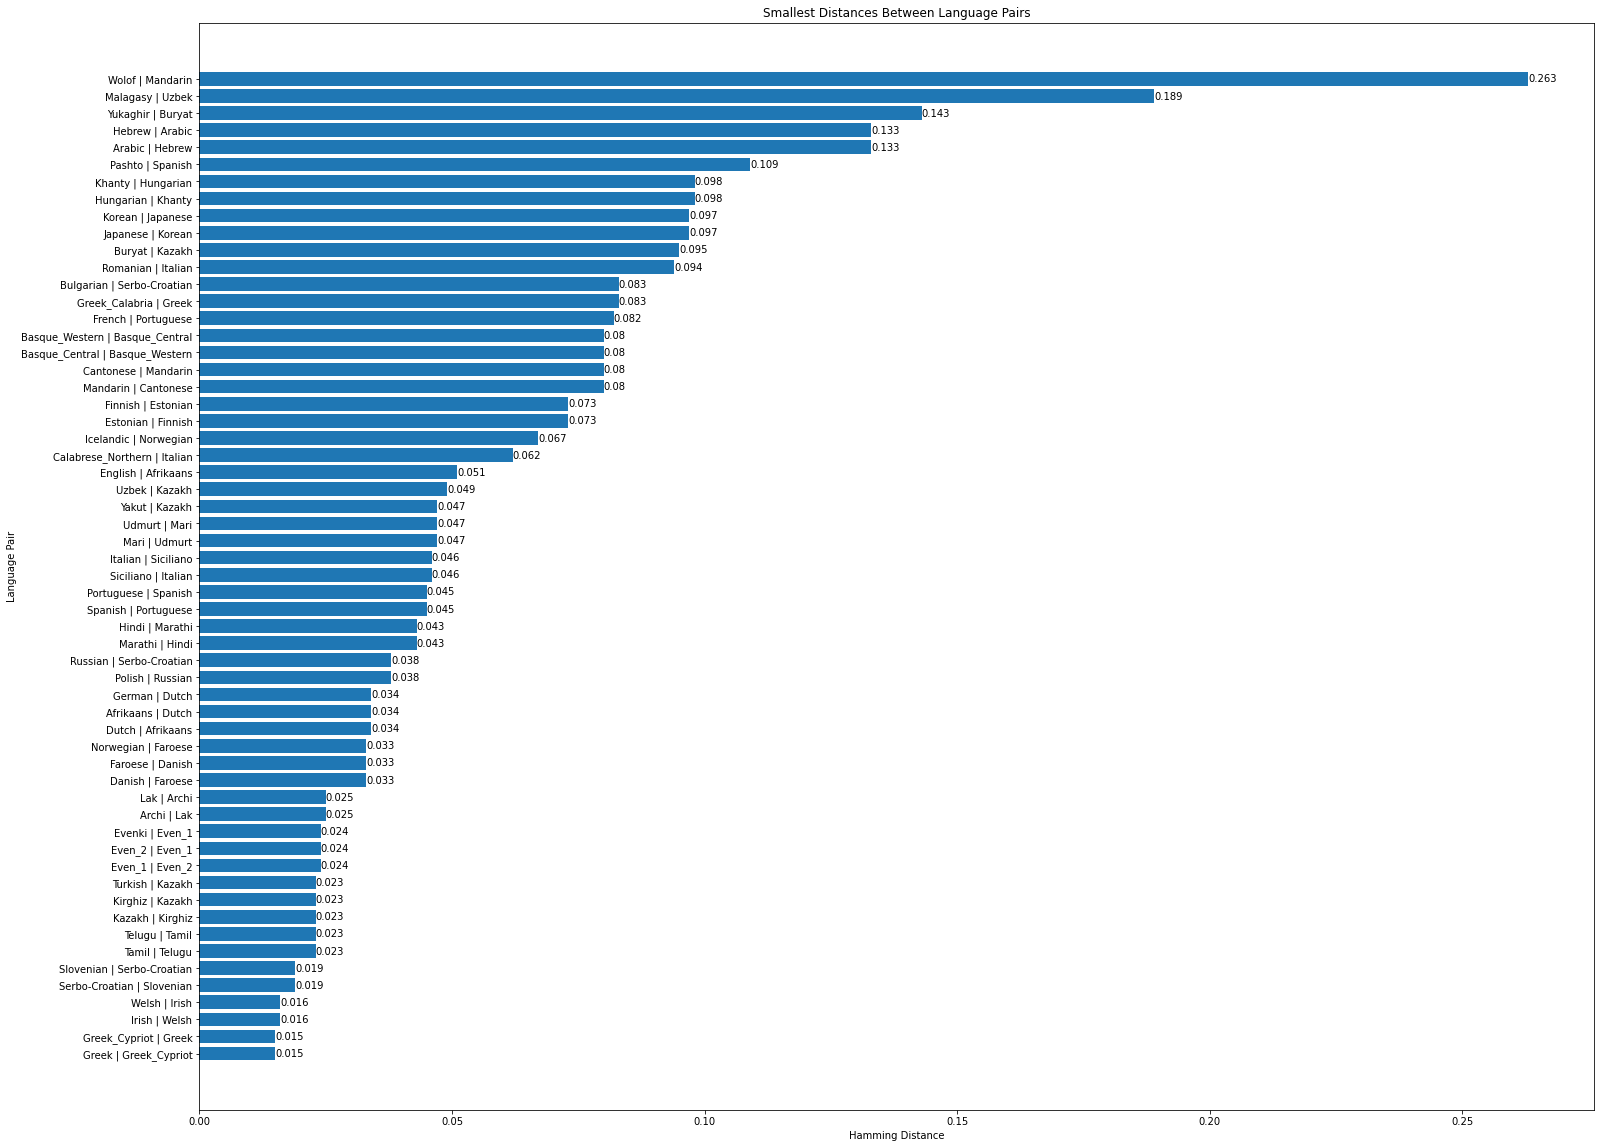

In [105]:
def get_top_n_per_column(df, n):
    result = {}
    for col in df.columns:
        bottom_n = df[col].nsmallest(2)
        bottom_n_values = bottom_n.tolist()
        bottom_n_indices = bottom_n.index.tolist()
        top_n_data = list(zip(bottom_n_indices, bottom_n_values))
        result[col] = top_n_data
        
    return result

top_distances = get_top_n_per_column(df, 1)
top_distances
result = {}
seen = set()
for k,v in top_distances.items():
    if k not in result:
        result[f"{k} | {v[1][0]}"] =  v[1][1]
        seen.add(v[1][0])
        seen.add(k)
result
sorted_data = dict(sorted(result.items(), key=lambda item: item[1]))

# Extract language pairs and distances from the sorted dictionary
language_pairs = list(sorted_data.keys())
distances = list(sorted_data.values())

# Create a horizontal bar plot
plt.figure(figsize=(25, 20))
plt.barh(language_pairs, distances)
plt.xlabel('Hamming Distance')
plt.ylabel('Language Pair')
plt.title('Smallest Distances Between Language Pairs')
# Display distance values on top of bars
for i, v in enumerate(distances):
    plt.text(v, i, str(v), va='center')
# plt.yticks(rotation=0, ha='center')  # Rotate y-axis labels for better readability
plt.savefig("smallest_distances.jpg")
plt.show()

In [106]:
indoeuropean_languages = [
    'Siciliano', 'Calabrese_Northern', 'Italian', 'Spanish', 'French', 'Portuguese',
    'Romanian', 'Greek_Calabria', 'Greek', 'Greek_Cypriot', 'English', 'Dutch', 'Afrikaans',
    'German', 'Danish', 'Icelandic', 'Faroese', 'Norwegian', 'Bulgarian', 'Serbo-Croatian',
    'Slovenian', 'Polish', 'Russian', 'Irish', 'Welsh', 'Marathi','Hindi','Pashto'
]

In [116]:
len(indoeuropean_languages)

28

In [121]:
all = list(df.columns)

In [122]:
non_indo = [x for x in all if x not in indoeuropean_languages]
non_indo

['Tamil',
 'Telugu',
 'Mandarin',
 'Cantonese',
 'Japanese',
 'Korean',
 'Arabic',
 'Hebrew',
 'Hungarian',
 'Khanty',
 'Estonian',
 'Finnish',
 'Mari',
 'Udmurt',
 'Yukaghir',
 'Even_1',
 'Even_2',
 'Evenki',
 'Yakut',
 'Uzbek',
 'Kazakh',
 'Kirghiz',
 'Turkish',
 'Buryat',
 'Basque_Central',
 'Basque_Western',
 'Wolof',
 'Malagasy',
 'Archi',
 'Lak']

In [ ]:
non_close_indo = df.loc[df.index.isin(indoeuropean_languages), df.columns.isin(non_indo)]
non_close_indo

def get_top_n_per_column(df, n):
    result = {}
    for col in df.columns:
        bottom_n = df[col].nsmallest(1)
        bottom_n_values = bottom_n.tolist()
        bottom_n_indices = bottom_n.index.tolist()
        top_n_data = list(zip(bottom_n_indices, bottom_n_values))
        result[col] = top_n_data
        
    return result

top_distances = get_top_n_per_column(non_close_indo, 1)
top_distances
result = {}
seen = set()
for k,v in top_distances.items():
    if k not in result:
        result[f"{k} | {v[0][0]}"] =  v[0][1]
        seen.add(v[0][0])
        seen.add(k)
result
sorted_data = dict(sorted(result.items(), key=lambda item: item[1]))

# Extract language pairs and distances from the sorted dictionary
language_pairs = list(sorted_data.keys())
distances = list(sorted_data.values())

# Create a horizontal bar plot
plt.figure(figsize=(25, 20))
plt.barh(language_pairs, distances)
plt.xlabel('Hamming Distance')
plt.ylabel('Language Pair')
plt.title('Smallest Distance Between a non-indo-european language to a indo-european language')
# Display distance values on top of bars
for i, v in enumerate(distances):
    plt.text(v, i, str(v), va='center')
# plt.yticks(rotation=0, ha='center')  # Rotate y-axis labels for better readability
plt.savefig("non-indo_to_indo_distances.jpg")
plt.show()

In [ ]:
filtered_df = df.loc[df.index.isin(indoeuropean_languages), df.columns.isin(indoeuropean_languages)]
filtered_df

In [ ]:
max_distance_pair = filtered_df.stack().idxmax()
max_distance_value = filtered_df.stack().max()

print(f"The pair with the largest distance is {max_distance_pair} with a distance of {max_distance_value}.")

In [ ]:
filtered_df.min()

In [ ]:
df_no_zeros = filtered_df.replace(0, np.nan)

min_distance_pair = df_no_zeros.stack().idxmin()
min_distance_value = df_no_zeros.stack().min()

print(f"The pair with the largest distance is {min_distance_pair} with a distance of {min_distance_value}.")

In [ ]:
def get_top_n_per_column(df, n):
    result = {}
    for col in df.columns:
        bottom_n = df[col].nlargest(1)
        bottom_n_values = bottom_n.tolist()
        bottom_n_indices = bottom_n.index.tolist()
        top_n_data = list(zip(bottom_n_indices, bottom_n_values))
        result[col] = top_n_data
        
    return result

top_distances = get_top_n_per_column(df_no_zeros, 1)
top_distances
result = {}
seen = set()
for k,v in top_distances.items():
    if k not in result:
        result[f"{k} | {v[0][0]}"] =  v[0][1]
        seen.add(v[0][0])
        seen.add(k)
result
sorted_data = dict(sorted(result.items(), key=lambda item: item[1]))

# Extract language pairs and distances from the sorted dictionary
language_pairs = list(sorted_data.keys())
distances = list(sorted_data.values())

# Create a horizontal bar plot
plt.figure(figsize=(15, 10))
plt.barh(language_pairs, distances)
plt.xlabel('Hamming Distance')
plt.ylabel('Language Pair')
plt.title('Largest Distances Between Language Pairs')
# Display distance values on top of bars
for i, v in enumerate(distances):
    plt.text(v, i, str(v), va='center')
# plt.yticks(rotation=0, ha='center')  # Rotate y-axis labels for better readability
plt.show()

In [ ]:
df_no_zeros['Siciliano'].nlargest()

In [ ]:
sorted_data = dict(sorted(result.items(), key=lambda item: item[1]))

# Extract language pairs and distances from the sorted dictionary
language_pairs = list(sorted_data.keys())
distances = list(sorted_data.values())

# Create a horizontal bar plot
plt.figure(figsize=(15, 10))
plt.barh(language_pairs, distances)
plt.xlabel('Hamming Distance')
plt.ylabel('Language Pair')
plt.title('Smallest Distances Between Language Pairs')
# Display distance values on top of bars
for i, v in enumerate(distances):
    plt.text(v, i, str(v), va='center')
# plt.yticks(rotation=0, ha='center')  # Rotate y-axis labels for better readability
plt.show()

In [ ]:
df_no_zeros.min()

In [ ]:
def get_top_n_per_column(df, n):
    result = {}
    for col in df.columns:
        bottom_n = df[col].nsmallest(0)[0]
        bottom_n_values = bottom_n.tolist()
        bottom_n_indices = bottom_n.index.tolist()
        top_n_data = list(zip(bottom_n_indices, bottom_n_values))
        result[col] = top_n_data
        
    return result

top_distances = get_top_n_per_column(df_no_zeros, 1)
data = top_distances

language_pairs = []
distances = []

for language, pairs in top_distances.items():
    for pair, distance in pairs:
        language_pairs.append((language, pair))
        distances.append(distance)

# Create a DataFrame with language pairs and distances
df_indo = pd.DataFrame({'Language1': [pair[0] for pair in language_pairs],
                   'Language2': [pair[1] for pair in language_pairs],
                   'Distance': distances})
min_distances = df_indo.groupby('Language1')['Distance'].min()

# Sort the minimum distances in ascending order
min_distances = min_distances.sort_values()

# Create a bar plot
plt.figure(figsize=(30, 10))
plt.bar(min_distances.index, min_distances.values)
plt.ylabel('Minimum Distance')
plt.title('Minimum Distances Between Languages')
plt.show()

In [ ]:
df_no_zeros.min()

In [3]:
art = pd.read_csv("/Users/ccreanga/projects/Boundaries/Artificial_Langs/random_distances_hamming.txt", names=["dist"])
art

,dist
Random,0.000
Random,0.000
Random,0.000
Random,0.000
Random,0.000
...,...
Random,0.632
Random,0.647
Random,0.650
Random,0.650


In [ ]:
sum(art['dist'] > 0.524)

In [ ]:
art['dist'].median()

In [ ]:
distance_counts


(58, 58)


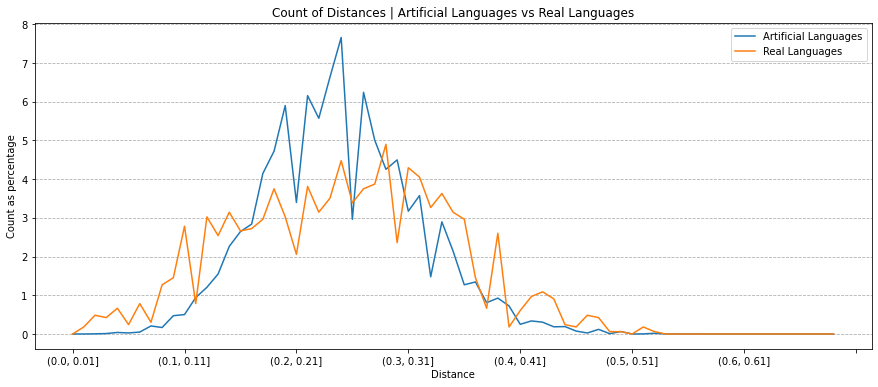

In [109]:
art = pd.read_csv("/Users/ccreanga/projects/Boundaries/Artificial_Langs/random_distances_hamming.txt", names=["dist"])
distance_counts = art['dist'].value_counts()
distance_counts = distance_counts.sort_values(ascending=False)

df = pd.read_csv("/Users/ccreanga/projects/Boundaries/TableS3_hamming", sep="\t", index_col=0)
print(df.shape)
df = df.melt()
distance_counts_real = df['value'].value_counts()
distance_counts_real = distance_counts_real.sort_values(ascending=False)


# Set the custom x-axis ticks
art['dist_bin'] = pd.cut(art['dist'], np.arange(0,0.7,0.01))
df['dist_bin'] = pd.cut(df['value'], np.arange(0,0.7,0.01))

# Count the occurrences of each bin
bin_counts = art['dist_bin'].value_counts()
bin_counts = round(bin_counts * 100 / 12497500, 3)
sorted_dist_bin_counts = bin_counts.sort_index()

bin_counts_df = df['dist_bin'].value_counts()
bin_counts_df = round(bin_counts_df * 100 / 3306, 3)
sorted_dist_bin_counts_df = bin_counts_df.sort_index()

# Create a bar plot
plt.figure(figsize=(15, 6))
sorted_dist_bin_counts.plot(label="Artificial Languages")
sorted_dist_bin_counts_df.plot(label="Real Languages")
# plt.xticks(custom_values, custom_xticks)
plt.xlabel('Distance')
plt.ylabel('Count as percentage')
plt.title('Count of Distances | Artificial Languages vs Real Languages')
plt.grid(axis='y', linestyle='--')
plt.legend()

# # Display count values on top of bars
# for i, v in enumerate(sorted_dist_bin_counts):
#     plt.text(i, v + 0.3, str(v)+"%", ha='center', va='bottom')
    

plt.show()

In [110]:
df.shape

(3364, 3)

In [111]:


# Create a list of custom x-axis tick values
custom_xticks = ['0.0 - 0.1', '0.1 - 0.2', '0.2 - 0.3', '0.3 - 0.4', '0.4 - 0.5', '0.5 - 0.6']
custom_values = [(0, 10), (10, 20), (20, 30), (30,40), (40, 50), (50,60)]


# Set the custom x-axis ticks

# Create bins
bins = range(0, 70, 10)
melted_df = df.melt()
melted_df['value_n'] = melted_df['value'].apply(lambda x: x*100)
# Group distances into bins
melted_df['dist_bin'] = pd.cut(melted_df['value_n'], bins)

# Count the occurrences of each bin
bin_counts = melted_df['dist_bin'].value_counts()
bin_counts = round(bin_counts * 100 / 3306, 3)
sorted_dist_bin_counts = bin_counts.sort_index()

# Create a bar plot
plt.figure(figsize=(8, 6))
sorted_dist_bin_counts.plot(kind='bar')
plt.xticks(range(len(custom_xticks)), custom_xticks)
plt.xlabel('Distance Bin')
plt.ylabel('Count as percentage')
plt.title('Count of Distances in Bins Real Languages')
plt.grid(axis='y', linestyle='--')

# Display count values on top of bars
for i, v in enumerate(sorted_dist_bin_counts):
    plt.text(i, v + 0.1, str(v)+"%", ha='center', va='bottom')

plt.show()

ValueError: value_name (value) cannot match an element in the DataFrame columns.

In [ ]:
list(bin_counts.index.sort_values())

In [ ]:
bin_counts = art['dist_bin'].value_counts()
bin_counts = round(bin_counts * 100 / 12497500, 3)
bin_counts

In [ ]:
melted_df_non_0 = melted_df[melted_df["value"] > 0]
melted_df_non_0.shape

In [ ]:
melted_df = melted_df.reset_index()
melted_df

In [112]:
g1
(20, 30]    35.269
(10, 20]    27.405
(30, 40]    26.255
(0, 10]      5.808
(40, 50]     5.021
(50, 60]     0.242
 
 g2
(20, 30]    52.387
(10, 20]    26.710
(30, 40]    18.336
(40, 50]     1.557
(0, 10]      0.976
(50, 60]     0.032
(60, 70]     0.001



SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (<ipython-input-112-05fad44e5bc2>, line 2)

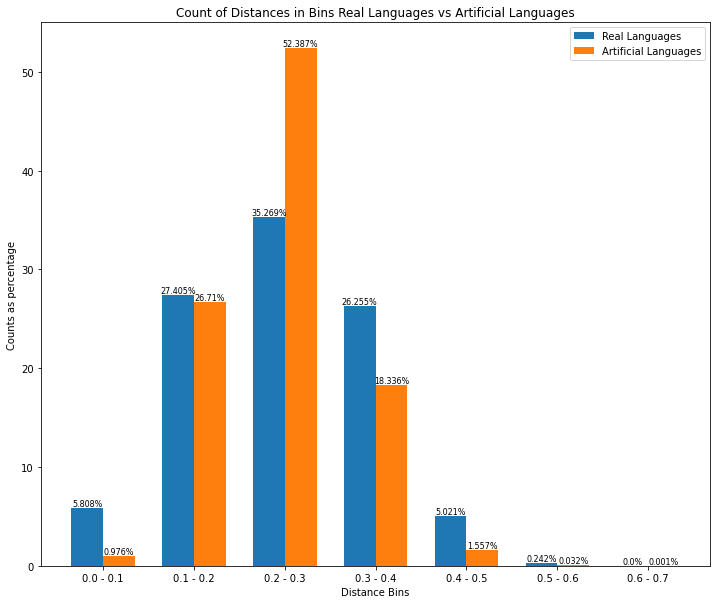

In [113]:


# Data
categories = ['0.0 - 0.1', '0.1 - 0.2', '0.2 - 0.3', '0.3 - 0.4', '0.4 - 0.5', '0.5 - 0.6', '0.6 - 0.7']

g1_values = [5.808, 27.405, 35.269, 26.255, 5.021, 0.242, 0]
g2_values = [0.976, 26.710, 52.387, 18.336, 1.557, 0.032, 0.001]

# Set up positions for bars
bar_width = 0.35
index = np.arange(len(categories))
plt.figure(figsize=(12, 10))

# Create grouped bar plot
bar1 = plt.bar(index - bar_width/2, g1_values, bar_width, label='Real Languages')
bar2 = plt.bar(index + bar_width/2, g2_values, bar_width, label='Artificial Languages')

# Add values on top of bars
def add_values(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, str(round(height, 3))+"%",
                 ha='center', va='bottom', fontsize=8)

add_values(bar1)
add_values(bar2)

# Customize the plot
plt.xlabel('Distance Bins')
plt.ylabel('Counts as percentage')
plt.title('Count of Distances in Bins Real Languages vs Artificial Languages')
plt.xticks(index, categories)
plt.legend()

# Show the plot
plt.show()


In [123]:
non_indo

['Tamil',
 'Telugu',
 'Mandarin',
 'Cantonese',
 'Japanese',
 'Korean',
 'Arabic',
 'Hebrew',
 'Hungarian',
 'Khanty',
 'Estonian',
 'Finnish',
 'Mari',
 'Udmurt',
 'Yukaghir',
 'Even_1',
 'Even_2',
 'Evenki',
 'Yakut',
 'Uzbek',
 'Kazakh',
 'Kirghiz',
 'Turkish',
 'Buryat',
 'Basque_Central',
 'Basque_Western',
 'Wolof',
 'Malagasy',
 'Archi',
 'Lak']

In [128]:
len(non_indo)

30

In [ ]:
finno_uric = ["Hungarian", "Khanty", "Estonian", "Finnish", "Mari", "Udmurt"]

In [124]:
turkic = ["Turkish", "Kazakh", "Kirghiz", "Uzbek", "Yakut"]

In [125]:
tungusic = ['Even_1', 'Even_2', 'Evenki']

In [126]:
mongol = ['Buryat']

In [194]:
dravidian_languages = ['Tamil', 'Telugu']

sino_tibetan_languages = ['Mandarin', 'Cantonese']

japonic_languages = ['Japanese']

koreanic_languages = ['Korean']

semitic_languages = ['Arabic', 'Hebrew']

uralic_languages = ['Hungarian', 'Khanty', 'Estonian', 'Finnish', 'Mari', 'Udmurt']

yukaghir_languages = ['Yukaghir']

tungusic_languages = ['Even_1', 'Even_2', 'Evenki']

turkic_languages = ['Yakut', 'Uzbek', 'Kazakh', 'Kirghiz', 'Turkish']

mongolic_languages = ['Buryat']

north_caucasian = ['Archi', 'Lak']

senegal = ['Wolof']

austronesian = ['Malagasy']

basque_languages = ['Basque_Central', 'Basque_Western']

In [195]:
language_groups = {
    "Dravidian": dravidian_languages,
    "Sino-Tibetan": sino_tibetan_languages,
    "Japonic": japonic_languages,
    "Koreanic": koreanic_languages,
    "Semitic": semitic_languages,
    "Uralic": uralic_languages,
    "Yukaghir": yukaghir_languages,
    "Tungusic": tungusic_languages,
    "Turkic": turkic_languages,
    "Mongolic": mongolic_languages,
    "North Caucasian": north_caucasian,
    "Senegalese": senegal,
    "Austronesian": austronesian,
    "Basque": isolate_languages
}

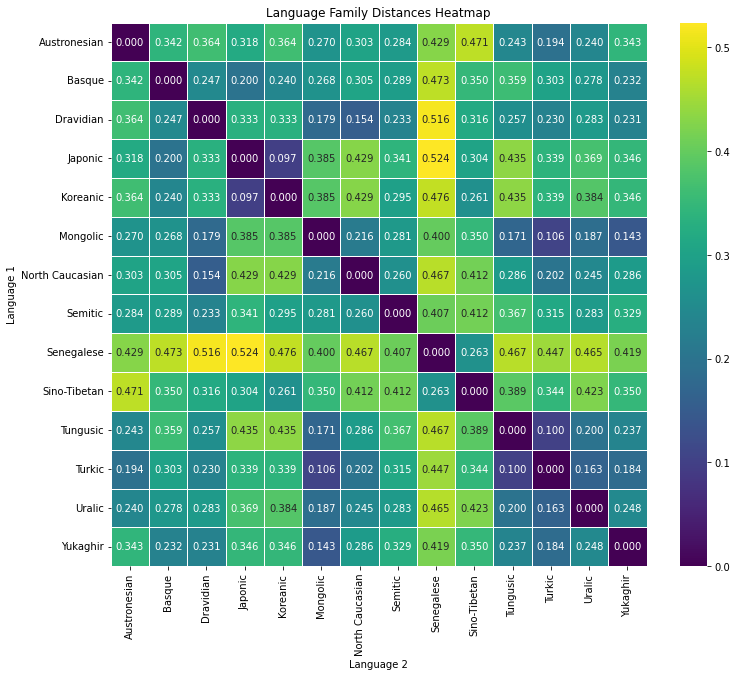

In [196]:

# Create a dictionary of family distances
family_distances = {}
for family1 in language_groups:
    for family2 in language_groups:
        if family1 == family2:
            # Distance to itself is 0
            family_distances[(family1, family2)] = 0
        else:
            # Calculate average distance between languages in each family
            family1_distances = []
            family2_distances = []
            for lang1 in language_groups[family1]:
                for lang2 in language_groups[family2]:
                    distance = df[lang1][lang2]
                    family1_distances.append(distance)
                    family2_distances.append(distance)
            family_distance = ((sum(family1_distances) / len(family1_distances)) + (sum(family2_distances) / len(family2_distances))) / 2
            family_distances[(family1, family2)] = family_distance

# Create a Pandas DataFrame from the family distances dictionary
# df_h = pd.DataFrame.from_dict(family_distances, orient='index', columns=['Distance'])
# df_h.index.names = ['Family 1', 'Family 2']

# Convert the dictionary to a DataFrame
df_h = pd.DataFrame([[k[0], k[1], v] for k, v in family_distances.items()], columns=['Language 1', 'Language 2', 'Distance'])

# Pivot the DataFrame for heatmap
heatmap_data = df_h.pivot_table(index='Language 1', columns='Language 2', values='Distance')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".3f", linewidths=.5)
plt.title('Language Family Distances Heatmap')
plt.show()

In [202]:
sorted_dict = dict(sorted(family_distances.items(), key=lambda item: item[1]))
sorted_dict

{('Dravidian', 'Dravidian'): 0,
 ('Sino-Tibetan', 'Sino-Tibetan'): 0,
 ('Japonic', 'Japonic'): 0,
 ('Koreanic', 'Koreanic'): 0,
 ('Semitic', 'Semitic'): 0,
 ('Uralic', 'Uralic'): 0,
 ('Yukaghir', 'Yukaghir'): 0,
 ('Tungusic', 'Tungusic'): 0,
 ('Turkic', 'Turkic'): 0,
 ('Mongolic', 'Mongolic'): 0,
 ('North Caucasian', 'North Caucasian'): 0,
 ('Senegalese', 'Senegalese'): 0,
 ('Austronesian', 'Austronesian'): 0,
 ('Basque', 'Basque'): 0,
 ('Japonic', 'Koreanic'): 0.097,
 ('Koreanic', 'Japonic'): 0.097,
 ('Turkic', 'Tungusic'): 0.10039999999999999,
 ('Tungusic', 'Turkic'): 0.1004,
 ('Turkic', 'Mongolic'): 0.10579999999999998,
 ('Mongolic', 'Turkic'): 0.10579999999999998,
 ('Yukaghir', 'Mongolic'): 0.143,
 ('Mongolic', 'Yukaghir'): 0.143,
 ('Dravidian', 'North Caucasian'): 0.154,
 ('North Caucasian', 'Dravidian'): 0.154,
 ('Uralic', 'Turkic'): 0.16336666666666666,
 ('Turkic', 'Uralic'): 0.1633666666666667,
 ('Tungusic', 'Mongolic'): 0.171,
 ('Mongolic', 'Tungusic'): 0.171,
 ('Dravidian', '

In [199]:
dravidian_languages = ['Tamil', 'Telugu']

sino_tibetan_languages = ['Mandarin', 'Cantonese']
(df["Tamil"]["Mandarin"] + df["Tamil"]["Cantonese"] + df["Telugu"]["Cantonese"] + df["Telugu"]["Mandarin"]) / 4

0.316

In [54]:
art = pd.read_csv("/Users/ccreanga/projects/Boundaries/Artificial_Langs/random_distances_hamming.txt", names=["dist"])

items = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.11, 0.12, 0.13, 0.14, 0.15]
res = []
for item in items:
    res.append(round(len(art[art['dist'] <= item]) * 100 / 12497500, 3))
res

[0.0,
 0.0,
 0.0,
 0.004,
 0.015,
 0.055,
 0.081,
 0.131,
 0.338,
 0.504,
 0.976,
 1.477,
 2.419,
 3.624,
 5.172,
 7.435]

In [55]:
24482 * 100 / 12497500

0.19589517903580717

In [56]:
art[art['dist'] <= 0.10]

,dist
Random,0.0
Random,0.0
Random,0.0
Random,0.0
Random,0.0
...,...
Random,0.1
Random,0.1
Random,0.1
Random,0.1


In [44]:
122023 * 100 / 12497500

0.976379275855171

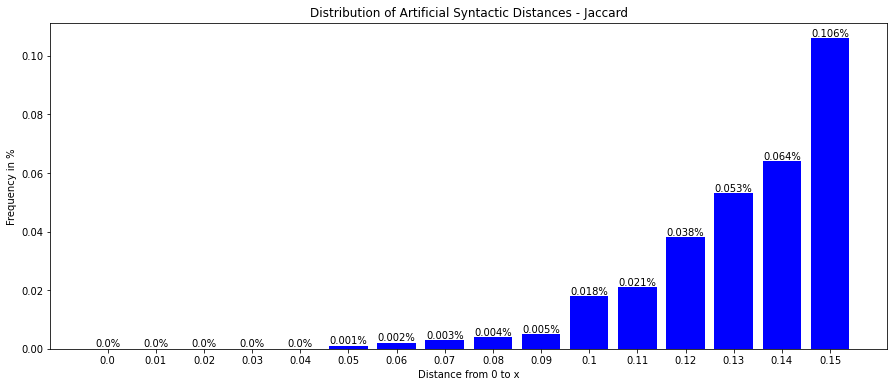

In [48]:
plt.figure(figsize=(10, 6))
plt.bar([str(x) for x in items], res, color='blue')
for i, v in enumerate(res):
    plt.text(i, v, str(v)+"%", ha='center', va='bottom')
plt.xlabel('Distance from 0 to x')
plt.ylabel('Frequency in %')
plt.title('Distribution of Syntactic Distances')
plt.show()

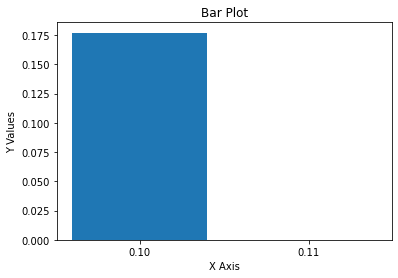

In [18]:
x_axis = ["0.10", "0.11"]
y_values = [0.177, 0.0]

plt.bar(x_axis, y_values)
plt.xlabel('X Axis')
plt.ylabel('Y Values')
plt.title('Bar Plot')
plt.show()


In [3]:
indoeuropean_language_families = {
    "Romance": [
        "Siciliano",
        "Calabrese_Northern",
        "Italian",
        "Spanish",
        "French",
        "Portuguese",
        "Romanian",
    ],
    "Hellenic": [
        "Greek_Calabria",
        "Greek",
        "Greek_Cypriot",
    ],
    "Germanic": [
        "English",
        "Dutch",
        "Afrikaans",
        "German",
        "Danish",
        "Icelandic",
        "Faroese",
        "Norwegian",
    ],
    "Slavic": [
        "Bulgarian",
        "Serbo-Croatian",
        "Slovenian",
        "Polish",
        "Russian",
    ],
    "Celtic": [
        "Irish",
        "Welsh",
    ],
    "Indo-Iranian": [
        "Marathi",
        "Hindi",
        "Pashto",
    ],
}

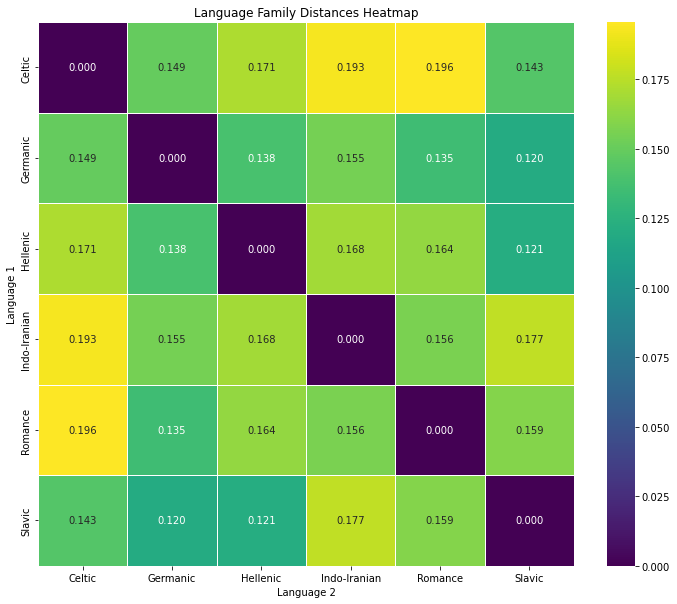

In [ ]:

# Create a dictionary of family distances
family_distances = {}
for family1 in indoeuropean_language_families:
    for family2 in indoeuropean_language_families:
        if family1 == family2:
            # Distance to itself is 0
            family_distances[(family1, family2)] = 0
        else:
            # Calculate average distance between languages in each family
            family1_distances = []
            family2_distances = []
            for lang1 in indoeuropean_language_families[family1]:
                for lang2 in indoeuropean_language_families[family2]:
                    distance = df[lang1][lang2]
                    family1_distances.append(distance)
                    family2_distances.append(distance)
            family_distance = ((sum(family1_distances) / len(family1_distances)) + (sum(family2_distances) / len(family2_distances))) / 2
            family_distances[(family1, family2)] = family_distance

# Create a Pandas DataFrame from the family distances dictionary
# df_h = pd.DataFrame.from_dict(family_distances, orient='index', columns=['Distance'])
# df_h.index.names = ['Family 1', 'Family 2']

# Convert the dictionary to a DataFrame
df_h = pd.DataFrame([[k[0], k[1], v] for k, v in family_distances.items()], columns=['Language 1', 'Language 2', 'Distance'])

# Pivot the DataFrame for heatmap
heatmap_data = df_h.pivot_table(index='Language 1', columns='Language 2', values='Distance')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".3f", linewidths=.5)
plt.title('Language Family Distances Heatmap')
plt.show()